# Deep Learning Basics

At a high-level, neural networks are either encoders, decoders, or a combination of both. Encoders find patterns in raw data to form compact, useful representations. Decoders generate new data or high-resolution useful infomation from those representations. As the lecture describes, deep learning discovers ways to **represent** the world so that we can reason about it. The rest is clever methods that help use deal effectively with visual information, language, sound (#1-6) and even act in a world based on this information and occasional rewards (#7).

1. **Feed Forward Neural Networks (FFNNs)** - classification and regression based on features. See [Part 1](#Part-1:-Boston-Housing-Price-Prediction-with-Feed-Forward-Neural-Networks) of this tutorial for an example.
2. **Convolutional Neural Networks (CNNs)** - image classification, object detection, video action recognition, etc. See [Part 2](#Part-2:-Classification-of-MNIST-Dreams-with-Convolution-Neural-Networks) of this tutorial for an example.
3. **Recurrent Neural Networks (RNNs)** - language modeling, speech recognition/generation, etc. See [this TF tutorial on text generation](https://www.tensorflow.org/tutorials/sequences/text_generation) for an example.
4. **Encoder Decoder Architectures** - semantic segmentation, machine translation, etc. See [our tutorial on semantic segmentation](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_driving_scene_segmentation/tutorial_driving_scene_segmentation.ipynb) for an example.
5. **Autoencoder** - unsupervised embeddings, denoising, etc.
6. **Generative Adversarial Networks (GANs)** - unsupervised generation of realistic images, etc. See [this TF tutorial on DCGANs](https://github.com/tensorflow/tensorflow/blob/r1.11/tensorflow/contrib/eager/python/examples/generative_examples/dcgan.ipynb) for an example.
7. **Deep Reinforcement Learning** - game playing, robotics in simulation, self-play, neural arhitecture search, etc. We'll be releasing notebooks on this soon and will link them here.

There are selective omissions and simplifications throughout these tutorials, hopefully without losing the essence of the underlying ideas. See Einstein quote...

# Prerequisites:

![Einstein](https://i.imgur.com/vfPDHGN.png)

[tf.keras](https://www.tensorflow.org/guide/keras) is the simplest way to build and train neural network models in TensorFlow. So, that's what we'll stick with in this tutorial, unless the models neccessitate a lower-level API.

Note that there's [tf.keras](https://www.tensorflow.org/guide/keras) (comes with TensorFlow) and there's [Keras](https://keras.io/) (standalone). You should be using [tf.keras](https://www.tensorflow.org/guide/keras) because (1) it comes with TensorFlow so you don't need to install anything extra and (2) it comes with powerful TensorFlow-specific features.

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

### Import data

In [2]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_train[0])

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Visualize Data

Label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


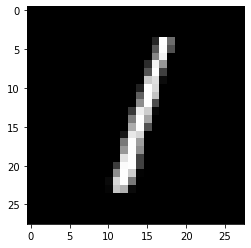

In [4]:
print("Label:",y_test[2:3])
plt.imshow(x_test[2:3].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

In [3]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(68, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 68)                2244      
                                                                 
 dense_2 (Dense)             (None, 32)                2208      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 29,902
Trainable params: 29,902
Non-trainable params: 0
_________________________________________________________________


### Design a model

### Weights before Training

Shape of First Layer (784, 32)
Visualization of First Layer


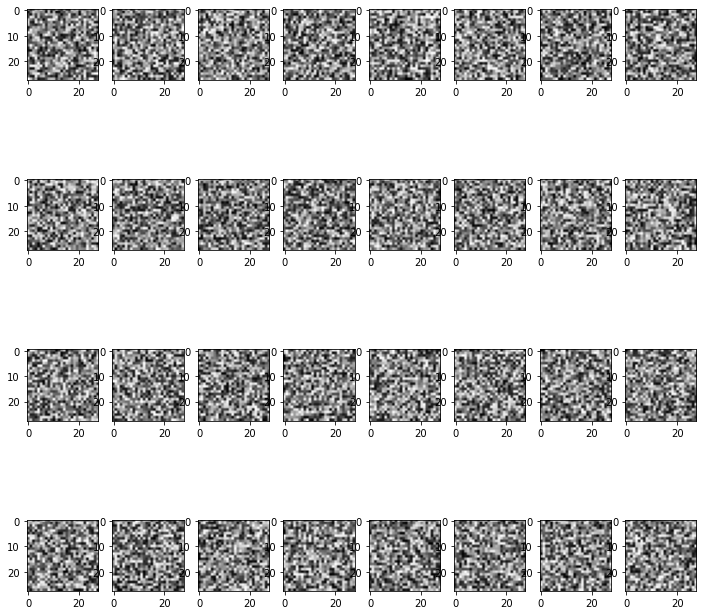

In [5]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [20]:
# Write the Training input and output variables,  size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=2)

Epoch 1/2
469/469 - 1s - loss: 0.1454 - accuracy: 0.9584 - 1s/epoch - 3ms/step
Epoch 2/2
469/469 - 1s - loss: 0.1343 - accuracy: 0.9609 - 1s/epoch - 2ms/step


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Testing

In [10]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1975 - accuracy: 0.9444
Test loss: 0.19751331210136414
Test accuracy: 0.9444000124931335


### Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


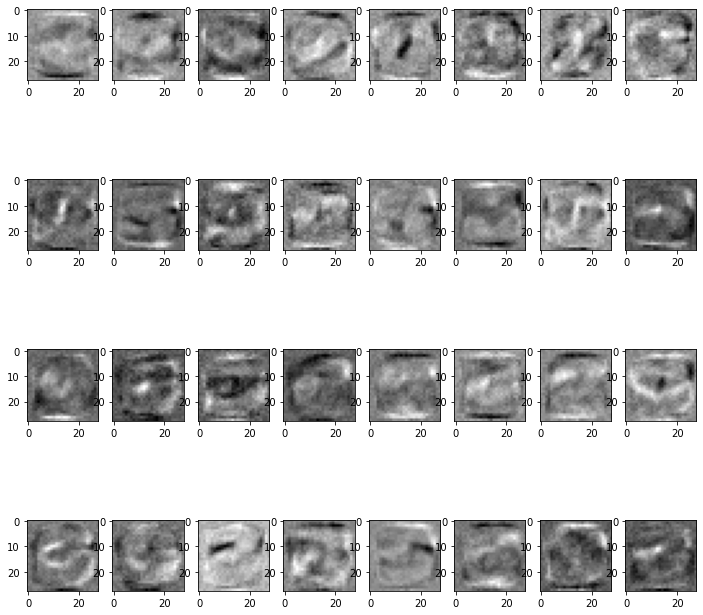

In [11]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [12]:
# Write the index of the test sample to test
prediction = model.predict(x_test[310:311])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 88ms/step
Prediction
 [1.8423474e-06 2.0869893e-03 9.0123725e-04 9.9232262e-01 2.8731581e-06
 2.6821573e-03 2.8314560e-06 6.5692526e-04 1.2733098e-03 6.9380527e-05]

Thresholded output
 [0 0 0 1 0 0 0 0 0 0]


### User Input

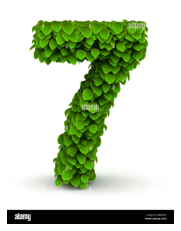

In [21]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('/content/7.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

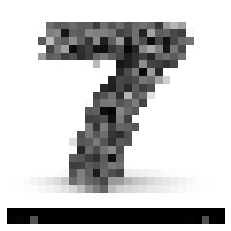

In [22]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('/content/7.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [23]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 23ms/step
Prediction Score:
 [9.4272418e-06 2.5814797e-03 2.1370503e-03 9.4052380e-01 5.4277589e-06
 5.3421717e-02 3.9407863e-05 1.2704356e-04 1.1347495e-03 1.9929666e-05]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [24]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [26]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [27]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.1263 - accuracy: 0.9636
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.1186 - accuracy: 0.9653
Test loss: 0.1449936330318451
Test accuracy: 0.9578999876976013


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [29]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 6280      
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 2.0379 - accuracy: 0.4000 - val_loss: 1.7710 - val_accuracy: 0.5562
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 1.5372 - accuracy: 0.6212 - val_loss: 1.3293 - val_accuracy: 0.6828
Test loss: 1.3292639255523682
Test

# Part 4: Design Choices in Neural Networks

Tasks for the Lab

Task 1. Lower the  number of layers and compute the test accuracy. Dump the model and weights as a json file.

In [41]:
# Write your code here 
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
#model.add(Dense(68, activation='sigmoid'))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

#compile

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

#training

history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=2)


#testing

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                25120     
                                                                 
 dense_30 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 - 2s - loss: 0.8433 - accuracy: 0.8224 - 2s/epoch - 3ms/step
Epoch 2/2
469/469 - 1s - loss: 0.3481 - accuracy: 0.9087 - 1s/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step - loss: 0.2932 - accuracy: 0.9191
Test loss: 0.29317671060562134
Test accuracy: 0.9190999865531921


In [39]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("Task1.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("Task1.h5")
print("Saved model to disk")

Saved model to disk


Task 2: Increase the number of layers and compute the test accuracy. Dump the model and weights as a json file. 

In [43]:
# Write your code here 
# Write your code here 
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(68, activation='sigmoid'))
model.add(Dense(90, activation='sigmoid'))
model.add(Dense(77, activation='sigmoid'))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

#compile

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

#training

history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=2)


#testing

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                25120     
                                                                 
 dense_32 (Dense)            (None, 68)                2244      
                                                                 
 dense_33 (Dense)            (None, 90)                6210      
                                                                 
 dense_34 (Dense)            (None, 77)                7007      
                                                                 
 dense_35 (Dense)            (None, 10)                780       
                                                                 
Total params: 41,361
Trainable params: 41,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 - 2s - loss: 1.4175 - accuracy:

In [42]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("Task2.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("Task2.h5")
print("Saved model to disk")

Saved model to disk


Task 3: Play around with different type of activation functions. Dump the model and weights as a json file.

In [46]:
# Write your code here 
# Write your code here 
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='tanh', input_shape=(784,)))
model.add(Dense(68, activation='tanh'))
model.add(Dense(32, activation='tanh'))


model.add(Dense(num_classes, activation='softmax'))
model.summary()

#compile

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

#training

history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=2)


#testing

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 32)                25120     
                                                                 
 dense_46 (Dense)            (None, 68)                2244      
                                                                 
 dense_47 (Dense)            (None, 32)                2208      
                                                                 
 dense_48 (Dense)            (None, 10)                330       
                                                                 
Total params: 29,902
Trainable params: 29,902
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 - 2s - loss: 0.4160 - accuracy: 0.8882 - 2s/epoch - 4ms/step
Epoch 2/2
469/469 - 1s - loss: 0.1976 - accuracy: 0.9422 - 1s/epoch - 3ms/step
313/313 [==============

In [47]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("Task3.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("Task3.h5")
print("Saved model to disk")

Saved model to disk


Task 4. Increase the number of layers and number of neurons in network. Compute the accuracy and dump the model and the weights. 

In [50]:
# Write your code here 
# Write your code here 
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(95, activation='relu'))
model.add(Dense(124, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(22, activation='relu'))


model.add(Dense(num_classes, activation='softmax'))
model.summary()

#compile

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

#training

history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=7,
                    verbose=2)


#testing

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 32)                25120     
                                                                 
 dense_62 (Dense)            (None, 95)                3135      
                                                                 
 dense_63 (Dense)            (None, 124)               11904     
                                                                 
 dense_64 (Dense)            (None, 256)               32000     
                                                                 
 dense_65 (Dense)            (None, 22)                5654      
                                                                 
 dense_66 (Dense)            (None, 10)                230       
                                                                 
Total params: 78,043
Trainable params: 78,043
Non-tra

In [51]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("Task4.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("Task4.h5")
print("Saved model to disk")

Saved model to disk
